# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнил студент группы ФИО ГРУППА
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| Ковер Серпинского
| Дерево Пифагора 

### Выполнение:

In [1]:
import turtle
import time

def create_l_system(iters, axiom, rules):
    start_string = axiom
    if iters == 0:
        return axiom
    end_string = ""
    for _ in range(iters):
        end_string = "".join(rules[i] if i in rules else i for i in start_string)
        start_string = end_string

    return end_string


def draw_l_system(t, instructions, angle, distance):
    for cmd in instructions:
        if cmd == 'F':
            t.forward(distance)
        elif cmd == '+':
            t.right(angle)
        elif cmd == '-':
            t.left(angle)


def main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0,
        x_offset=0, offset_angle=0, width=450, height=450):

    inst = create_l_system(iterations, axiom, rules)
    t = turtle.Turtle()
    turtle.tracer(1, 0)  
    wn = turtle.Screen()
    wn.setup(width, height)
    t.up()
    t.backward(-x_offset)
    t.left(90)
    t.backward(-y_offset)
    t.left(offset_angle)
    t.down()
    t.speed(30000)
    t.pensize(size)
    draw_l_system(t, inst, angle, length)
    t.hideturtle()
   

# Кривая Коха

In [2]:
angle = 60
axiom = "F"
rules = {"F": "F+F--F+F" }

step = 0
iterations = int(input("Введите глубину  - "))
main(iterations, axiom, rules, angle, length=8, size=2, y_offset=-300, x_offset=500, offset_angle=90, width=1480, height=700)
print("Глубина   Время")
for i in range (5):
    step += 1
    start_time = time.perf_counter()
    main(step, axiom, rules, angle, length=8, size=2, y_offset=-300, x_offset=500, offset_angle=90, width=1480, height=700)
    print("   ", step, ("    {:.6f} ms    ".format((time.perf_counter() - start_time) * 1000)))

Введите глубину  - 4
Глубина   Время
    1     32.175500 ms    
    2     55.567600 ms    
    3     123.246100 ms    
    4     431.925900 ms    
    5     990.607000 ms    


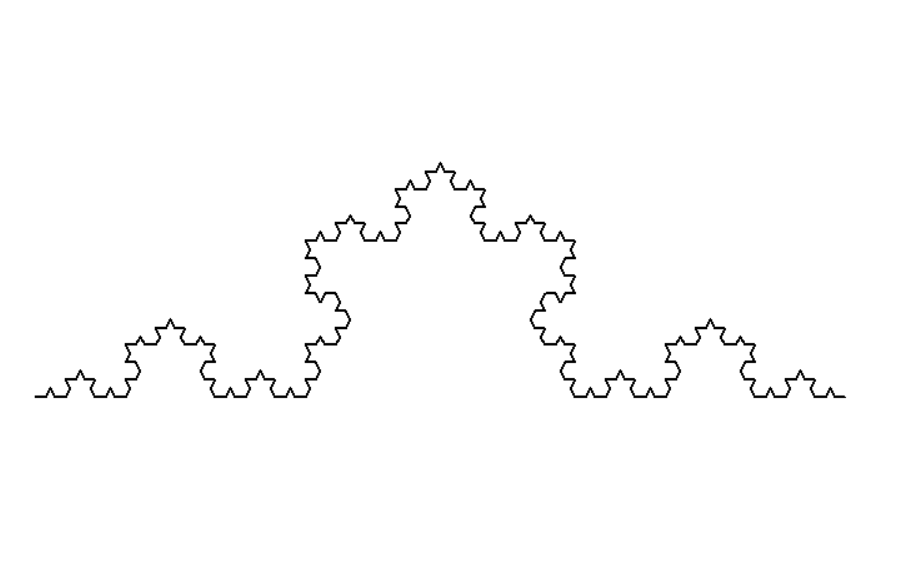

# Кривая Гильберта

In [2]:
axiom = "L"
rules = {"L":"+RF-LFL-FR+", "R":"-LF+RFR+FL-"}
angle = 90
step = 0
iterations = int(input("Введите глубину - "))
main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=600, height=600)
print("Глубина   Время")
for i in range (5):
    step += 1
    start_time = time.perf_counter()
    main(step, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=600, height=600)
    print("   ", step, ("    {:.6f} ms    ".format((time.perf_counter() - start_time) * 1000)))

Введите глубину - 5
Глубина   Время
    1     11.905100 ms    
    2     26.323900 ms    
    3     101.482000 ms    
    4     493.500900 ms    
    5     1956.449300 ms    


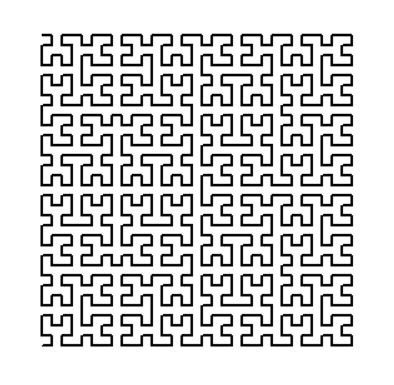

# Кривая Серпинского

In [4]:
axiom = "F+XF+F+XF"
rules = {"X":"XF-F+F-XF+F+XF-F+F-X"}
angle = 90
iterations = int(input("Введите глубину - "))
main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=600, height=600)
step = 0
print("Глубина   Время")
for i in range (5):
    step += 1
    start_time = time.perf_counter()
    main(step, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=600, height=600)
    print("   ", step, ("    {:.6f} ms    ".format((time.perf_counter() - start_time) * 1000)))

Введите глубину - 4
Глубина   Время
    1     50.309500 ms    
    2     139.930700 ms    
    3     573.295400 ms    
    4     1754.338100 ms    
    5     3185.516800 ms    


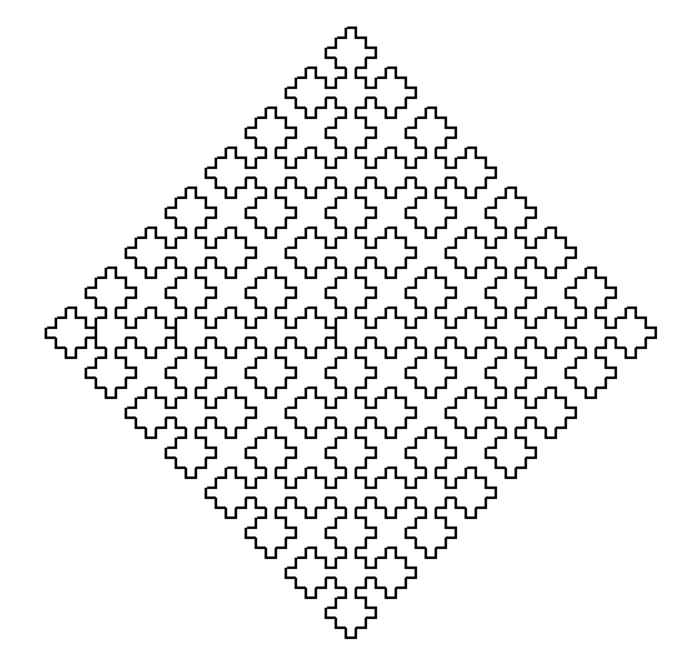

# Салфетка Серпинского

In [2]:
axiom = "FXF--FF--FF"
rules = {"F":"FF", "X":"--FXF++FXF++FXF--"}
angle = 60
iterations = int(input("Введите глубину - "))
main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=1200, height=600)
step = 0
print("Глубина   Время")
for i in range (5):
    step += 1
    start_time = time.perf_counter()
    main(step, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=1200, height=600)
    print("   ", step, ("    {:.6f} ms    ".format((time.perf_counter() - start_time) * 1000)))

Введите глубину - 4
Глубина   Время
    1     31.189900 ms    
    2     78.355800 ms    
    3     300.995200 ms    
    4     827.057100 ms    
    5     2047.636100 ms    


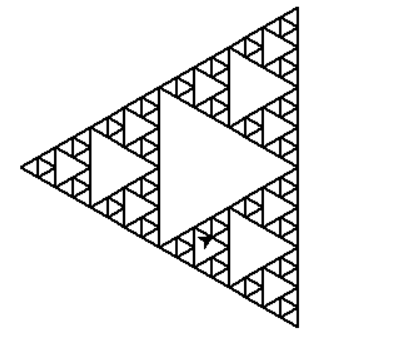

# Ковер Серпинского

In [1]:
import turtle
import time
def sierp_carpet(n, m):
    if n == 0:
        turtle.color('black')
        turtle.begin_fill()
        for _ in range(4):
            turtle.forward(m)
            turtle.left(90)
        turtle.end_fill()
 
    else:
        for _ in range(4):
            sierp_carpet(n - 1, m / 3)
            turtle.forward(m / 3)
 
            sierp_carpet(n - 1, m / 3)
            turtle.forward(m / 3)
 
            turtle.forward(m / 3)
            turtle.left(90)
 
 
turtle.tracer(100)
turtle.ht()
turtle.speed(300000)
iterations = int(input("Введите глубину - "))
sierp_carpet(iterations, iterations*100)
step = 1
print("Глубина   Время")
for i in range (4):
    start_time = time.perf_counter()
    sierp_carpet(step, step*100)
    print("   ", step, ("    {:.6f} ms    ".format((time.perf_counter() - start_time) * 1000)))
    step+=1

Введите глубину - 3
Глубина   Время
    1     16.093200 ms    
    2     158.357800 ms    
    3     3535.744500 ms    
    4     27304.651700 ms    


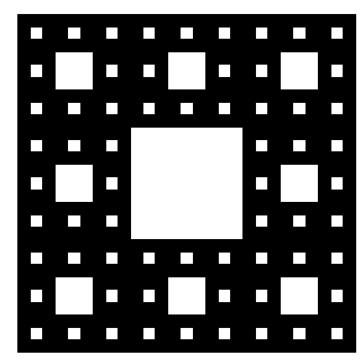

#  Дерево Пифагора

In [1]:
from turtle import*
from math import* 
import time
def fractal(aturt, depth, maxdepth):  
    if depth > maxdepth:  
        return 
    length = 180*((sqrt(2)/2)**depth)  
    anotherturt = aturt.clone()  
    aturt.forward(length)  
    aturt.left(45)  
    fractal(aturt, depth+1, maxdepth)  
    anotherturt.right(90)  
    anotherturt.forward(length)  
    anotherturt.left(90)  
    anotherturt.forward(length)  
    if depth != maxdepth:  
        turt3 = anotherturt.clone()  
        turt3.left(45)  
        turt3.forward(180*((sqrt(2)/2)**(1+depth)))  
        turt3.right(90)  
        fractal(turt3, depth+1, maxdepth)  
    anotherturt.left(90)  
    anotherturt.forward(length)  
def draw_fractal(maxdepth):  
    window = Screen()  
    t = Turtle()  
    t.hideturtle()  
    t.penup()  
    t.goto(-75, -225)  
    t.pendown()  
    t.speed(100000)  
    t.left(90)  
    fractal(t, 1, maxdepth)  
    
    
iterations = int(input("Введите глубину - "))
draw_fractal(iterations) 
step = 1
print("Глубина   Время")
for i in range (4):
    start_time = time.perf_counter()
    draw_fractal(step)
    print("   ", step, ("    {:.6f} ms    ".format((time.perf_counter() - start_time) * 1000)))
    step+=1

Введите глубину - 4
Глубина   Время
    1     540.907300 ms    
    2     889.229800 ms    
    3     1598.010800 ms    
    4     2979.984800 ms    


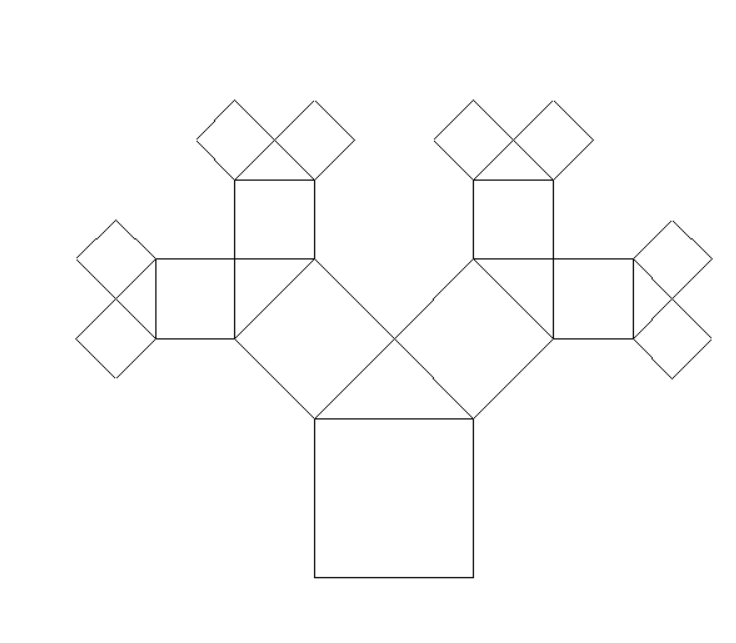

### Вывод